In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns  

In [2]:
data_train = pd.read_csv("titanic_train2.csv")     # reading train dataset
data_test=pd.read_csv("titanic_test2.csv")         #  reading test dataset

In [3]:
data_train.head()          

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_train.isnull().sum()     # checking null values of train dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_test.isnull().sum()         # checking null values of test dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# droping unwanted features after looking missing values .... cabin columns is almost null ..so drop it 
# and parch is unwanted from my point of view 
data_train.drop(columns=['Cabin'],inplace=True)          
data_test.drop(columns=['Cabin'],inplace=True)
data_train.drop(columns=['Parch'],inplace=True)
data_test.drop(columns=['Parch'],inplace=True)

In [8]:
data_train.head()                         # after droping 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S


In [9]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,3101298,12.2875,S


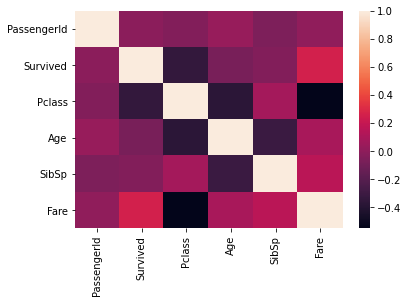

In [10]:
# important feature  selection
sns.heatmap(data_train.corr())        # corr() using heatmap 

In [11]:
data_train['Embarked'].value_counts()        # visualization embarked 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data_train['Embarked'].fillna('S',inplace=True)    # fill the null places with maximum category 

In [13]:
data_train.drop(columns=['Fare'],inplace=True)        # unwanted features ... fare does not decide anything .. 
data_test.drop(columns=['Fare'],inplace=True)

In [14]:
data_train.isnull().sum()               # only age has null values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [15]:
data_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Ticket          0
Embarked        0
dtype: int64

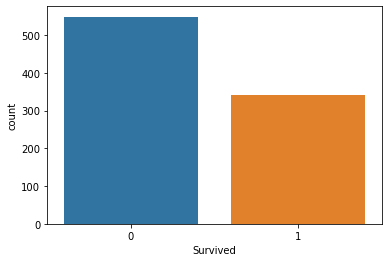

In [16]:
sns.countplot(data_train['Survived'])        

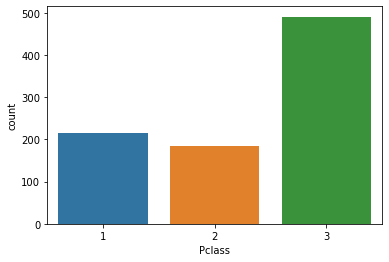

In [17]:
sns.countplot(data_train['Pclass'])

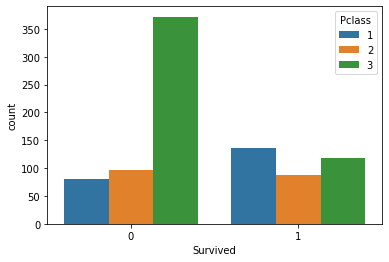

In [18]:
sns.countplot('Survived' , hue='Pclass' ,  data=data_train )             # pclass vs survived 

In [19]:
data_train.drop(columns=['Name','Ticket', 'PassengerId'],inplace=True)              # unwanted features 
data_test.drop(columns=['Name','Ticket', 'PassengerId'],inplace=True)           

In [20]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [21]:
data_test.head()

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,34.5,0,Q
1,3,female,47.0,1,S
2,2,male,62.0,0,Q
3,3,male,27.0,0,S
4,3,female,22.0,1,S


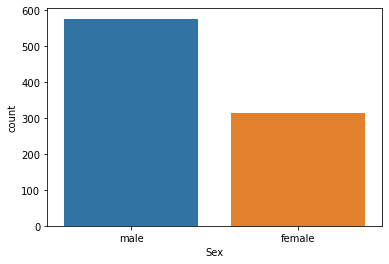

In [22]:
sns.countplot(data_train['Sex'])

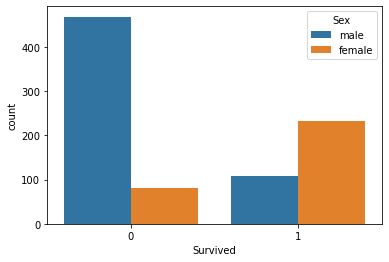

In [23]:
sns.countplot('Survived' , hue='Sex' ,   data=data_train)               # sex vs survived 

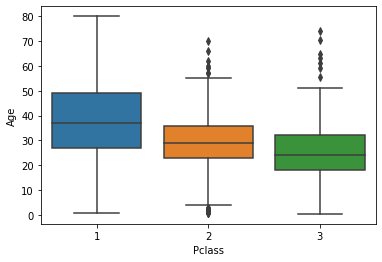

In [24]:
sns.boxplot(y='Age' , x = 'Pclass' , data=data_train)                 # age vs pclass 

In [25]:
def lw(cols):
    Pclass = cols[1]
    age = cols[0]

    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
        else:
            return 30
    else:
        return age

In [26]:
age_train = data_train[['Age', 'Pclass']].apply(lw , axis=1)           
age_test =  data_test[['Age', 'Pclass']].apply(lw , axis=1)

In [27]:
data_train['Age'][np.isnan(data_train['Age'])]=age_train         # filling age columns 
data_test['Age'][np.isnan(data_test['Age'])]=age_test

<ipython-input-27-ff4abd8addb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Age'][np.isnan(data_train['Age'])]=age_train         # filling age columns
<ipython-input-27-ff4abd8addb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Age'][np.isnan(data_test['Age'])]=age_test


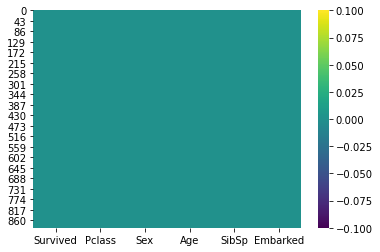

In [28]:
sns.heatmap(data_train.isnull() , cmap='viridis' )            # now no null values is here 

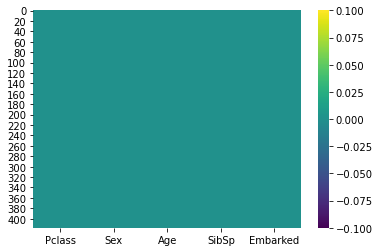

In [29]:
sns.heatmap(data_test.isnull() , cmap='viridis' )

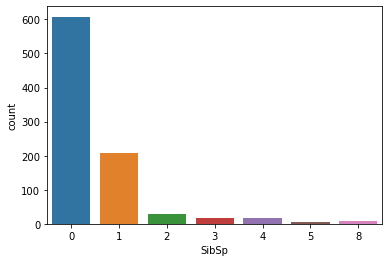

In [30]:
sns.countplot(data_train['SibSp'])

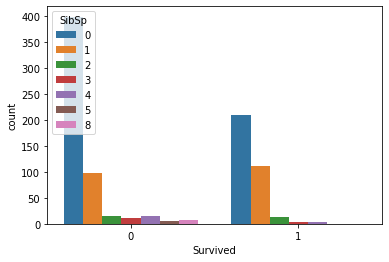

In [31]:
sns.countplot('Survived', hue=data_train['SibSp'] ,  data=data_train )         # sibsp vs survived 

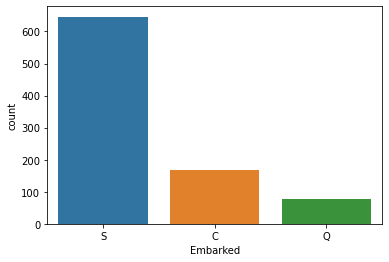

In [32]:
sns.countplot(data_train['Embarked'])

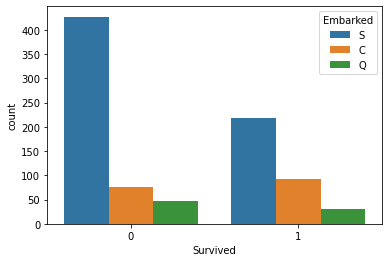

In [33]:
sns.countplot('Survived', hue=data_train['Embarked'] ,  data=data_train )          # survived vs embarked 

In [34]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [35]:
# one hot encoding for train dataset 
data_train = pd.get_dummies( data_train , columns=['Pclass','Sex','SibSp','Embarked'],  drop_first=True)

In [36]:
# one hot encoding for test dataset
data_test = pd.get_dummies( data_test , columns=['Pclass','Sex','SibSp','Embarked'],  drop_first=True)

In [37]:
data_train.head()

,Survived,Age,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
0,0,22.0,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,1,1,0,0,0,0,0,0,0,1


In [38]:
data_test.head()

,Age,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S
0,34.5,0,1,1,0,0,0,0,0,0,1,0
1,47.0,0,1,0,1,0,0,0,0,0,0,1
2,62.0,1,0,1,0,0,0,0,0,0,1,0
3,27.0,0,1,1,0,0,0,0,0,0,0,1
4,22.0,0,1,0,1,0,0,0,0,0,0,1


In [39]:
X=data_train.iloc[:,1:].values           
y=data_train.iloc[:,0].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

C:\Users\SOURAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=lr.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[90, 23],
       [16, 50]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [48]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred=clf.predict(X_test)

In [50]:
confusion_matrix(y_pred, y_test)

array([[88, 24],
       [18, 49]], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)

0.7653631284916201